<a href="https://colab.research.google.com/github/binit-13/Machine-Learning-Notes/blob/main/Logistic_regression_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sigmoid = $\frac{1}{1+e^{-x}}$
## derivative of sigmoid = $\sigma(x)[1-\sigma(x)]$

### Loss function of Perceptron aka Log loss
#### crossentropy = $ \sum_{i=1}^{n}  -y_{i}log(\hat y_{i}) - (1-y_{i})log(1-\hat y_{i}) $
Average loss =  $-\frac{1}{n}  \sum_{i=1}^{n}  y_{i}log(\hat y_{i}) - (1-y_{i})log(1-\hat y_{i}) $
#### $\hat y_{i}$ = $\sigma$ ($W_{i} * X_{i} + β $) ---> max likelihood
#### So this becomes a optimization probelm where we have to minimize this loss function updating weights and biases

## Derivative of Loss function
### $ \frac {-1}{m} (y-\hat y)X $
##### here m is no.of rows

In [6]:
import numpy as np

from sklearn.datasets import make_classification

import matplotlib.pyplot as plt


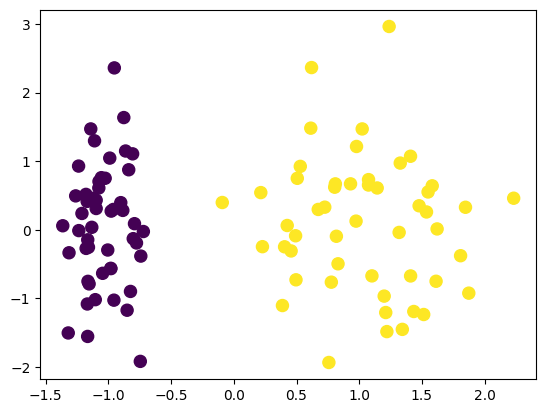

In [124]:
X,y = make_classification(n_samples=100,
                          n_features=2,
                          n_informative=1,
                          n_redundant=0,
                          n_classes = 2,
                          n_clusters_per_class=1,
                          random_state=41)
plt.scatter(X[:,0],X[:,1],c=y,s=75)

In [125]:
X.shape

(100, 2)

In [225]:
class logistic_regression:

  def __init__(self,lr,epochs):
    self.lr = lr
    self.epochs = epochs

  def sigmoid(self,x):
    return 1/(1+np.exp(-x))

  def fit(self,X, y):
    X = np.insert(X, 0, 1,axis=1)
    self.beta_ = np.ones(X.shape[1])
    all_beta = []

    for i in range(self.epochs):
      y_hat = self.sigmoid(np.dot(X, self.beta_)) ## each and every calculation here is matrix calc...
      loss_ = -y*np.log(y_hat) - (1-y)*np.log(1-y_hat)

      #lr*(np.dot((y-y_hat),X)/X.shape[0])
      self.beta_ = self.beta_ + self.lr * (np.dot((y-y_hat),X)/X.shape[0]) ## doing matrix calculation hence the dot product

    return self.beta_[1:], self.beta_[0] # we will be having 1x3 matrix as bias was also added.

  def predict(self,X):
    self.pred = self.sigmoid(np.dot(self.beta_[1:].reshape(1,-1),X.T)+self.beta_[0])
    return self.pred



In [229]:
lg = logistic_regression(lr=0.5,epochs=5000)

In [230]:
coef, bias = lg.fit(X,y)

In [231]:
print(coef)
print(bias)

[9.87413522 0.55976247]
2.7491592032144676


In [164]:
y

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [130]:
lg.predict(X)

array([[0.7274366 , 0.95664116, 0.96008968, 0.42263313, 0.77715886,
        0.28506038, 0.93867017, 0.85084436, 0.73424155, 0.27174146,
        0.55633644, 0.55143805, 0.91951814, 0.79201674, 0.32605431,
        0.886514  , 0.91876741, 0.3664226 , 0.94016744, 0.42153146,
        0.27937961, 0.58181945, 0.50686839, 0.84876945, 0.73714089,
        0.76078594, 0.57170147, 0.51606011, 0.15898929, 0.396615  ,
        0.7823093 , 0.85269214, 0.80308213, 0.92267744, 0.97020649,
        0.80728427, 0.66453356, 0.67724548, 0.50518761, 0.93094328,
        0.67234378, 0.36559641, 0.62879042, 0.8761603 , 0.13839682,
        0.96180954, 0.57071879, 0.56193959, 0.467849  , 0.61984505,
        0.81579715, 0.94431175, 0.76475512, 0.7832476 , 0.9705213 ,
        0.22198522, 0.77490858, 0.78951762, 0.42435185, 0.75928802,
        0.68303769, 0.5819273 , 0.78482468, 0.96058148, 0.87763761,
        0.55938885, 0.95705182, 0.57258353, 0.58118849, 0.38828102,
        0.9816976 , 0.90514909, 0.24461076, 0.94

(-3.0, 2.0)

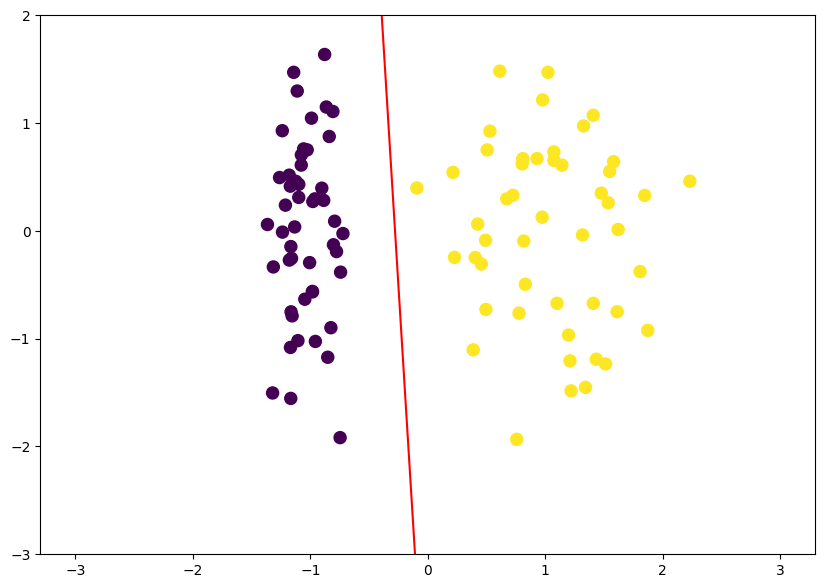

In [233]:
slope = -(coef[0]/coef[1])
intercept = -(bias/coef[1])
X_input = np.linspace(-3,3,100)
y_input = X_input*slope + intercept

plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1],c=y,s=75)
plt.plot(X_input, y_input, color = 'r')
plt.ylim(-3,2)
